In [1]:
from datetime import date
from import_dataset import download_json
from other_functions import *
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
create_directory('Datasets')

today = date.today()
todays_file = 'covid_{}.json'.format(today)
current_filename = 'Datasets/' + todays_file


if os.path.isfile(current_filename) == True:
    print('True')
else:
    download_json()

Datasets folder already exists!
True


In [3]:
todays_file

'covid_2020-11-03.json'

In [4]:
check_files = find_suffix_filenames('Datasets/', '.json')
check_files

{'path': 'Datasets/', 'filenames': ['covid_2020-11-03.json']}

In [5]:
clean_directory(check_files, exclude=[todays_file])

['.DS_Store', 'covid_2020-11-03.json']

In [6]:
def split_json_to_dfs(filename):
    read_df = pd.read_json(filename)
    ### Dataframe #1
    country_information = read_df.T.drop('data', 1).reset_index()
    ### Dataframe #2
    country_key = country_information[['index', 'location', 'continent']]
    ### Datafrane #3
    covid_cases = read_df.T['data']
    combined_df = pd.DataFrame()
    for country in list(covid_cases.keys()):
        new_df = pd.DataFrame.from_dict(covid_cases[country], orient='columns')
        new_df['country_code'] = country
        combined_df = combined_df.append(new_df)
    combined_df['date']= pd.to_datetime(combined_df['date'])
    return country_information, country_key, combined_df


In [7]:
# Merging with Keys
country_information, country_key, combined_df = split_json_to_dfs(current_filename)
combined_df = combined_df.merge(country_key, 
                                how='left',
                                left_on='country_code', 
                                right_on='index').drop(['country_code', 'index'], axis = 1)

In [8]:
country_stat_dict = country_information[country_information['location'] == 'Canada'].to_dict('records')[0]
country_stat_dict

{'index': 'CAN',
 'continent': 'North America',
 'location': 'Canada',
 'population': 37742157.0,
 'population_density': 4.037,
 'median_age': 41.4,
 'aged_65_older': 16.984,
 'aged_70_older': 10.797,
 'gdp_per_capita': 44017.591,
 'diabetes_prevalence': 7.37,
 'life_expectancy': 82.43,
 'cardiovasc_death_rate': 105.599,
 'handwashing_facilities': nan,
 'hospital_beds_per_thousand': 2.5,
 'human_development_index': 0.926,
 'extreme_poverty': 0.5,
 'female_smokers': 12.0,
 'male_smokers': 16.6}

In [9]:
value = country_stat_dict['population']

In [10]:
col_reorder = combined_df.columns.to_list()
if 'location' in col_reorder: col_reorder.remove('location')
col_reorder.insert(1, 'location')
combined_df = combined_df[col_reorder]
combined_df.head()

,date,location,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,...,positive_rate,hosp_patients,hosp_patients_per_million,icu_patients,icu_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,continent
0,2020-03-13,Aruba,2.0,2.0,0.0,18.733,18.733,0.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
1,2020-03-19,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,33.33,0.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
2,2020-03-20,Aruba,4.0,2.0,0.0,37.465,18.733,0.0,33.33,0.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
3,2020-03-21,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,44.44,0.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
4,2020-03-22,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,44.44,0.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America


In [11]:
combined_df.columns

Index(['date', 'location', 'total_cases', 'new_cases', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'new_deaths_per_million', 'stringency_index', 'new_cases_smoothed',
       'new_deaths_smoothed', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'total_deaths',
       'total_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'hosp_patients',
       'hosp_patients_per_million', 'icu_patients', 'icu_patients_per_million',
       'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
       'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
       'continent'],
      dtype='object')

In [12]:
filtered = country_information[country_information['location'] == 'Canada'].drop(['index'], axis = 1)
x = filtered.to_dict(orient = 'records')[0]
x

{'continent': 'North America',
 'location': 'Canada',
 'population': 37742157.0,
 'population_density': 4.037,
 'median_age': 41.4,
 'aged_65_older': 16.984,
 'aged_70_older': 10.797,
 'gdp_per_capita': 44017.591,
 'diabetes_prevalence': 7.37,
 'life_expectancy': 82.43,
 'cardiovasc_death_rate': 105.599,
 'handwashing_facilities': nan,
 'hospital_beds_per_thousand': 2.5,
 'human_development_index': 0.926,
 'extreme_poverty': 0.5,
 'female_smokers': 12.0,
 'male_smokers': 16.6}

In [13]:
country_stat = ['continent', 'population', 'population_density', 'median_age']

df_country_stat = filtered[country_stat]
df_country_stat

,continent,population,population_density,median_age
33,North America,3.77422e+07,4.037,41.4


In [14]:
pd.DataFrame.from_dict(x, orient='index')

,0
continent,North America
location,Canada
population,3.77422e+07
population_density,4.037
median_age,41.4
aged_65_older,16.984
aged_70_older,10.797
gdp_per_capita,44017.6
diabetes_prevalence,7.37
life_expectancy,82.43


# Create Dropdown Option

In [15]:
drop_option = country_key.copy()
drop_option['value'] = drop_option['location']
drop_option = drop_option.drop('index', 1)
drop_option = drop_option.rename(columns = {'location': 'label', 'value': 'value'})

In [16]:
drop_option_list = drop_option.to_dict(orient='records')

# Updating Graph

In [17]:
min_date = min(combined_df['date'])
max_date = max(combined_df['date'])
time_elapse = max_date - min_date

<ipython-input-18-7bd90d8c847b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['new_cases_MA'] = output['new_cases'].rolling(window=10).mean()


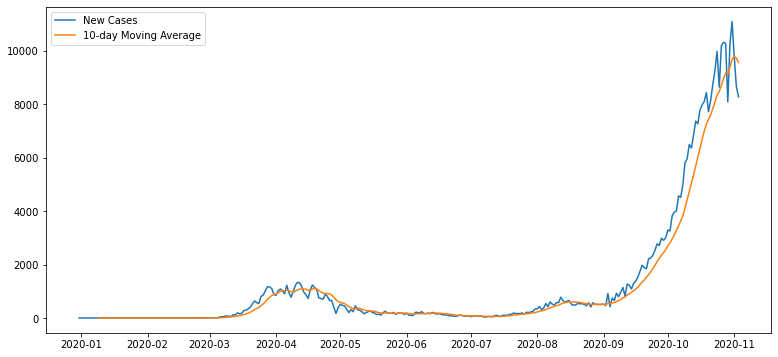

In [18]:
country_input = 'Netherlands'

def filter_country(df, select_country = 'World'):
    output = df[df['location'] == select_country]
    output['new_cases_MA'] = output['new_cases'].rolling(window=10).mean()
    return output

plt.figure(figsize=(13,6))
filtered_df = filter_country(combined_df, country_input)
plt.plot('date', 'new_cases',data= filtered_df, label = 'New Cases')
plt.plot('date', 'new_cases_MA', data= filtered_df, label = '10-day Moving Average')
plt.legend()
plt.show()

In [19]:
selected_country_info = country_information[country_information['location'] == country_input].to_dict('records')[0]
selected_country_info

{'index': 'NLD',
 'continent': 'Europe',
 'location': 'Netherlands',
 'population': 17134873.0,
 'population_density': 508.544,
 'median_age': 43.2,
 'aged_65_older': 18.779,
 'aged_70_older': 11.881,
 'gdp_per_capita': 48472.545,
 'diabetes_prevalence': 5.29,
 'life_expectancy': 82.28,
 'cardiovasc_death_rate': 109.361,
 'handwashing_facilities': nan,
 'hospital_beds_per_thousand': 3.32,
 'human_development_index': 0.931,
 'extreme_poverty': nan,
 'female_smokers': 24.4,
 'male_smokers': 27.3}

In [20]:
continent = selected_country_info['continent']
print(continent)

Europe


In [21]:
contr_list = country_information[country_information['continent'] == continent]['location'].to_list()

# Per continent comparison

In [22]:
selected_continent = selected_country_info['continent']

In [23]:
df_cont_filter = combined_df[combined_df['continent'] == selected_continent]
df_cont_filter.head()

,date,location,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,...,positive_rate,hosp_patients,hosp_patients_per_million,icu_patients,icu_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,continent
989,2020-03-09,Albania,2.0,2.0,0.0,0.695,0.695,0.000,36.11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
990,2020-03-10,Albania,6.0,4.0,0.0,2.085,1.390,0.000,41.67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
991,2020-03-11,Albania,10.0,4.0,0.0,3.475,1.390,0.000,51.85,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
992,2020-03-12,Albania,11.0,1.0,1.0,3.822,0.347,0.347,51.85,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
993,2020-03-13,Albania,23.0,12.0,0.0,7.992,4.170,0.000,78.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe


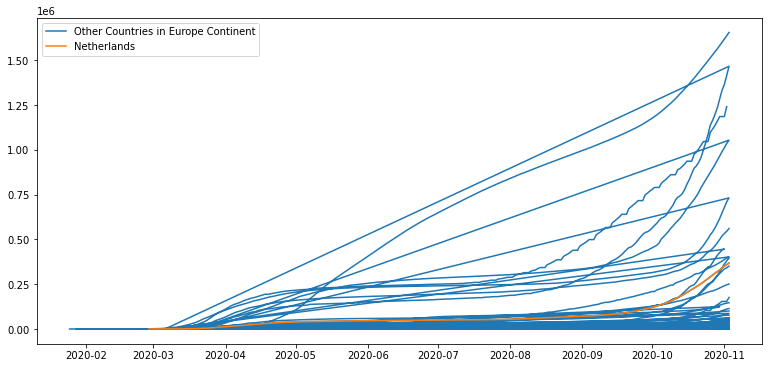

In [24]:
plt.figure(figsize=(13,6))
plt.plot('date','total_cases', data= df_cont_filter, label = 'Other Countries in {} Continent'.format(continent))
plt.plot('date', 'total_cases', data = filtered_df, label = '{}'.format(country_input))
plt.legend()
plt.show()

In [33]:
str(today)

'2020-11-03'

In [52]:
order_case_list = ['date', 'location', 'total_cases']
ordered_cases = combined_df[combined_df['date'] == str(today)][order_case_list]
ordered_cases = ordered_cases[ordered_cases['location'] != 'World'].sort_values('total_cases',ascending = False)
ordered_cases['rank'] = ordered_cases['total_cases'].rank(ascending = False)
ordered_cases

,date,location,total_cases,rank
50890,2020-11-03,United States,9291245.0,1.0
23497,2020-11-03,India,8267623.0,2.0
7267,2020-11-03,Brazil,5554206.0,3.0
42291,2020-11-03,Russia,1655038.0,4.0
17369,2020-11-03,France,1466433.0,5.0
...,...,...,...,...
17060,2020-11-03,Falkland Islands,13.0,204.5
43585,2020-11-03,Solomon Islands,8.0,206.0
988,2020-11-03,Anguilla,3.0,207.0
32663,2020-11-03,Marshall Islands,2.0,208.0


In [60]:
combined_df[combined_df['location'] == 'Spain'][['date', 'new_deaths']].sort_values('new_deaths')

,date,new_deaths
15552,2020-05-25,-1918.0
15631,2020-08-12,-2.0
15406,2019-12-31,0.0
15606,2020-07-18,0.0
15600,2020-07-12,0.0
...,...,...
15498,2020-04-01,849.0
15499,2020-04-02,864.0
15501,2020-04-04,932.0
15500,2020-04-03,950.0
